In [ ]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import random
import pandas as pd
from sympy import symbols, sin, cos, hessian, diff, lambdify, exp, sqrt, pi, E

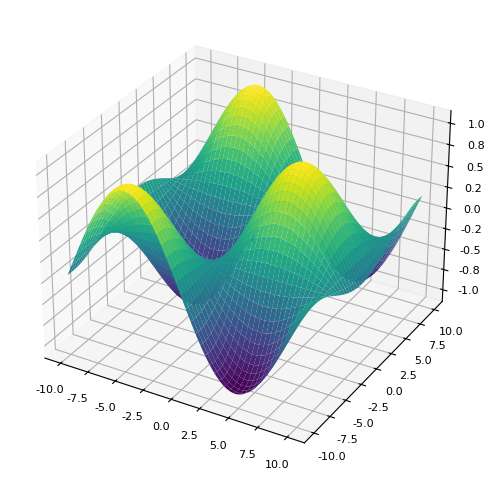

In [1]:

# Define the range of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = np.sin(x/3) * np.cos(y/3)

# Create a 3D plot
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=1)

# Add a red point to highlight the saddle point
# Increase the size (s) and opacity (alpha) to make the point more visible
ax.scatter([0], [0], [0], color='blue', s=100, alpha=1)

# Format the axis labels to 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Change the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set the axis label font size to 10
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)

# Display the plot
plt.show()

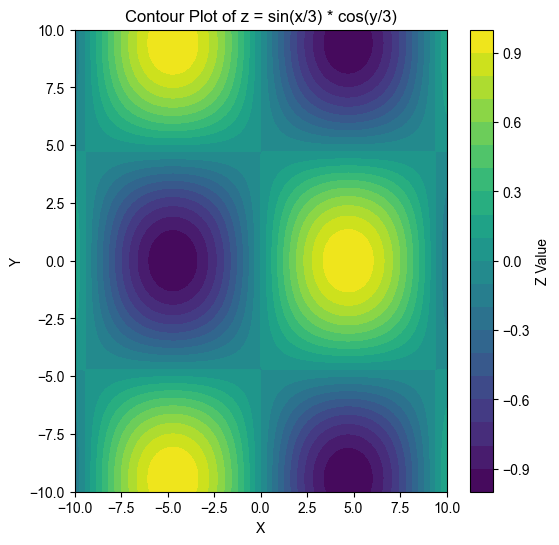

In [2]:
# Define the range of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = np.sin(x/3) * np.cos(y/3)

# Create a contour plot
plt.figure(figsize=(6, 6))
plt.contourf(x, y, z, levels=20, cmap='viridis')
plt.colorbar(label='Z Value')
plt.title('Contour Plot of z = sin(x/3) * cos(y/3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

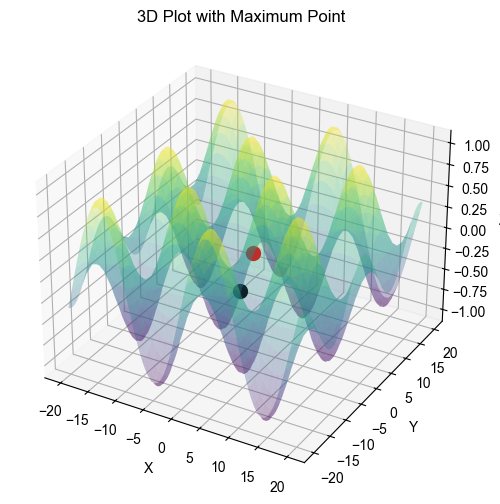

Initial point: x = -2.54, y = 2.17, z = -0.56
Maximum point: x = -1.06, y = 3.63, z = -0.12
Slope at maximum point: (0.11005426536486244, 0.10827291571093116)
Hessian < 0?: True
Vertical distance travelled: 0.44


In [35]:


# Define the function
def f(x, y):
    return np.sin(x/3) * np.cos(y/3)

# Define the gradients of the function
def grad(x, y):
    df_dx = 1/3 * np.cos(x/3) * np.cos(y/3)
    df_dy = -1/3 * np.sin(x/3) * np.sin(y/3)
    return df_dx, df_dy

# Gradient ascent algorithm
def gradient_ascent(x_start, y_start, learning_rate, epochs):
    x = x_start
    y = y_start
    for _ in range(epochs):
        grad_x, grad_y = grad(x, y)
        x += learning_rate * grad_x  # move in the direction of the gradient
        y += learning_rate * grad_y
    return x, y


def is_saddle_point(x_final, y_final):

    # Define the symbols
    x, y = symbols('x y')

    # Define the function
    z = sin(x/3)*cos(y/3)

    # Compute the Hessian matrix
    H = hessian(z, (x, y))
    
    # Evaluate the Hessian matrix at the point
    H_value = H.subs({x: x_final, y: y_final})

    # Compute the determinant of the Hessian matrix
    det_H = H_value.det()

    # If the determinant is less than zero, return True
    if det_H < 0:
        return True
    else:
        return False

# Parameters
x_start = random.uniform(-20.0, 20.0)
y_start = random.uniform(-20.0, 20.0)
learning_rate = 0.01
epochs = 1000

# Run gradient ascent
x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs)

# Define the range of x and y values
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = np.sin(x/3) * np.cos(y/3)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.3)

# Overlay the starting point
z_start = f(x_start, y_start)
ax.scatter(x_start, y_start, z_start, color='k', s=100)  # s is the size of the point

# Overlay the maximum point
z_max = f(x_max, y_max)
ax.scatter(x_max, y_max, z_max, color='r', s=100)  # s is the size of the point

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot with Maximum Point')

# Display the plot
plt.show()
print(f"Initial point: x = {x_start:.2f}, y = {y_start:.2f}, z = {z_start:.2f}")
print(f"Maximum point: x = {x_max:.2f}, y = {y_max:.2f}, z = {z_max:.2f}")
print(f"Slope at maximum point: {(grad(x_max, y_max))}")
print(f"Hessian < 0?: {is_saddle_point(x_max, y_max)}")
print(f"Vertical distance travelled: {(z_max - z_start):.2f}")

/var/folders/lm/ht15fnhx0j9bcx93t1l385680000gn/T/ipykernel_42027/2701142260.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)


            x_start       y_start         x_max         y_max        z_diff  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.014166      0.006420      3.963301      0.004348      0.953648   
std        1.003702      1.004096      0.397160      0.398886      0.273303   
min       -3.749893     -4.372942     -2.920713     -6.860623      0.023996   
25%       -0.661639     -0.674374      3.846619     -0.149739      0.764919   
50%        0.022618      0.006238      4.038709      0.001323      0.958001   
75%        0.691155      0.671904      4.178321      0.152480      1.148876   
max        3.770629      3.763516      4.579414      6.765794      1.608132   

            z_start         z_max  
count  10000.000000  10000.000000  
mean       0.004109      0.957757  
std        0.300305      0.065692  
min       -0.934450     -0.033321  
25%       -0.204754      0.954426  
50%        0.007103      0.972827  
75%        0.214374      0.982964  


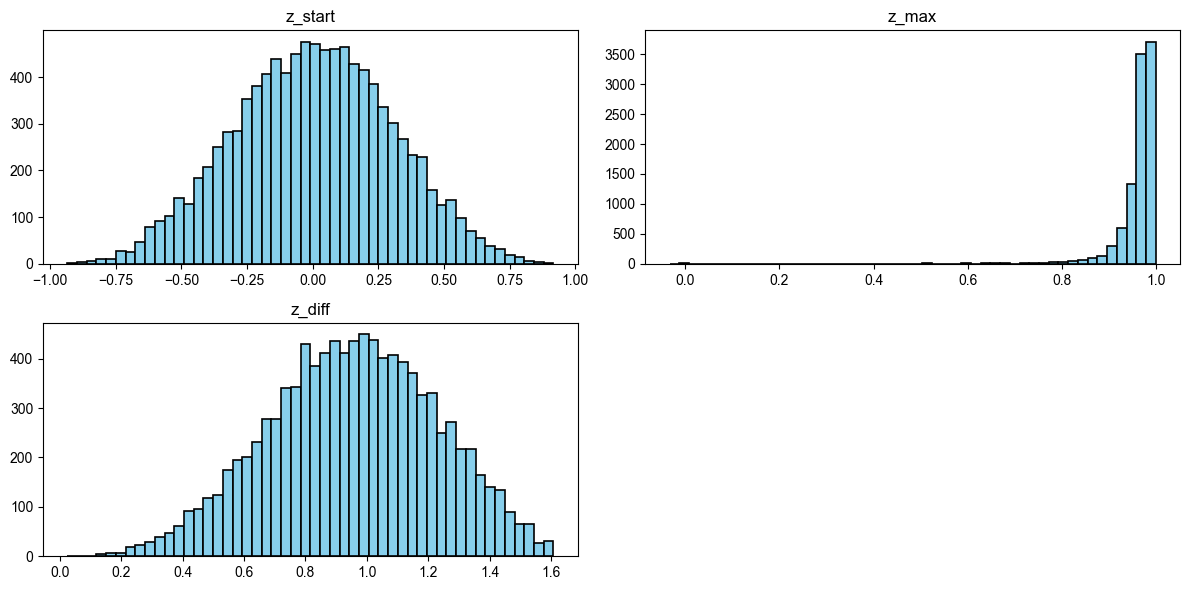

In [48]:
# Define the function
def f(x, y):
    return np.sin(x/3) * np.cos(y/3)

# Create an empty dataframe to store the simulation data
simulation_data = pd.DataFrame(columns=['x_start', 'y_start', 'x_max', 'y_max', 'z_diff'])

# Define the number of simulations
num_simulations = 10000
learning_rate = 0.02
epochs = 1000

# Perform the simulations
for _ in range(num_simulations):
    # Generate random starting coordinates
    x_start = np.random.normal(0, 1)
    y_start = np.random.normal(0, 1)
    
    # Perform the gradient ascent algorithm and obtain the maximum point
    x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs)
    
    # Calculate the difference between the maximum and starting z values
    z_start = f(x_start, y_start)
    z_max = f(x_max, y_max)
    z_diff = z_max - z_start

    # Create a new DataFrame with the data for this simulation
    new_data = pd.DataFrame([{'x_start': x_start, 'y_start': y_start, 'z_start': z_start, 'x_max': x_max, 'y_max': y_max, 'z_max': z_max, 'z_diff': z_diff}])

    # Concatenate the new data to the simulation_data DataFrame
    simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)

print(simulation_data.describe())
print("\n")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Top left: z_start
axs[0, 0].hist(simulation_data["z_start"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 0].set_title('z_start')

# Top right: z_max
axs[0, 1].hist(simulation_data["z_max"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 1].set_title('z_max')

# Bottom: z_diff
axs[1, 0].hist(simulation_data["z_diff"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[1, 0].set_title('z_diff')

# Remove the unused subplot
fig.delaxes(axs[1,1])

plt.tight_layout()
plt.show()
    

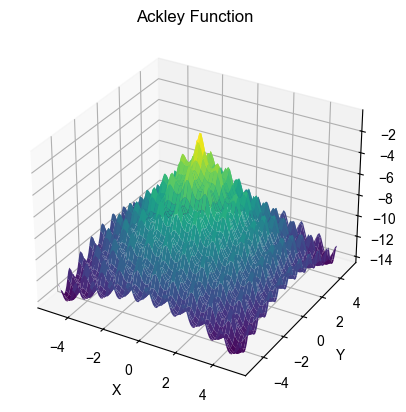

In [55]:
def ackley(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c*x) + np.cos(c*y)))
    return (term1 + term2 + a + np.exp(1))*-1

# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z values using the Ackley function
Z = ackley(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ackley Function')

# Show the plot
plt.show()


In [56]:
ackley(0, 0)

-4.440892098500626e-16

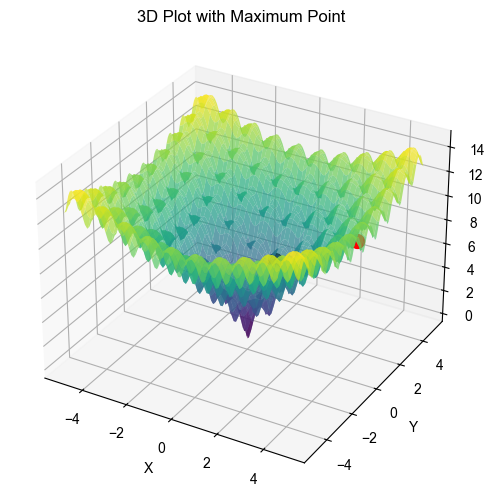

Initial point: x = 0.46, y = 1.34, z = 5.89
Maximum point: x = 4.71, y = 0.00, z = 10.98
Slope at maximum point: (9.291410971104903e-06, -4.074238935640844e-06)
Vertical distance travelled: 5.09


In [77]:
# Define the function
def f(x, y):
    return (-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)

# Define the symbols
x, y = symbols('x y')

# Define the function
z = (-20 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + E + 20)

# Compute the gradients of the function
grad_x = lambdify((x, y), diff(z, x), 'numpy')
grad_y = lambdify((x, y), diff(z, y), 'numpy')

# Parameters
x_start = np.random.normal(0, 1)
y_start = np.random.normal(0, 1)
learning_rate = 0.01
epochs = 10000

# Run gradient ascent
x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs)

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = (-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7)

# Overlay the starting point
z_start = f(x_start, y_start)
ax.scatter(x_start, y_start, z_start, color='k', s=100)  # s is the size of the point

# Overlay the maximum point
z_max = f(x_max, y_max)
ax.scatter(x_max, y_max, z_max, color='r', s=100)  # s is the size of the point

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot with Maximum Point')

# Display the plot
plt.show()
print(f"Initial point: x = {x_start:.2f}, y = {y_start:.2f}, z = {z_start:.2f}")
print(f"Maximum point: x = {x_max:.2f}, y = {y_max:.2f}, z = {z_max:.2f}")
print(f"Slope at maximum point: {(grad(x_max, y_max))}")
print(f"Vertical distance travelled: {(z_max - z_start):.2f}")

/var/folders/lm/ht15fnhx0j9bcx93t1l385680000gn/T/ipykernel_42027/168143678.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)


            x_start       y_start         x_max         y_max        z_diff  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.009288     -0.003543      4.453847      0.001186      6.324160   
std        0.996471      0.998399      0.268843      0.269970      1.718454   
min       -3.873834     -3.710274     -3.850534     -8.460780     -1.732500   
25%       -0.670160     -0.674808      4.425171     -0.050510      5.104491   
50%       -0.009318     -0.008003      4.487621     -0.000643      6.600118   
75%        0.657915      0.662272      4.534605      0.049217      7.522828   
max        3.787979      3.904087      4.678948      8.177598     11.097404   

            z_start         z_max  
count  10000.000000  10000.000000  
mean       4.747720     11.071880  
std        1.631663      0.277867  
min        0.035367      7.785436  
25%        3.602562     11.043841  
50%        4.523792     11.154420  
75%        5.955284     11.192155  


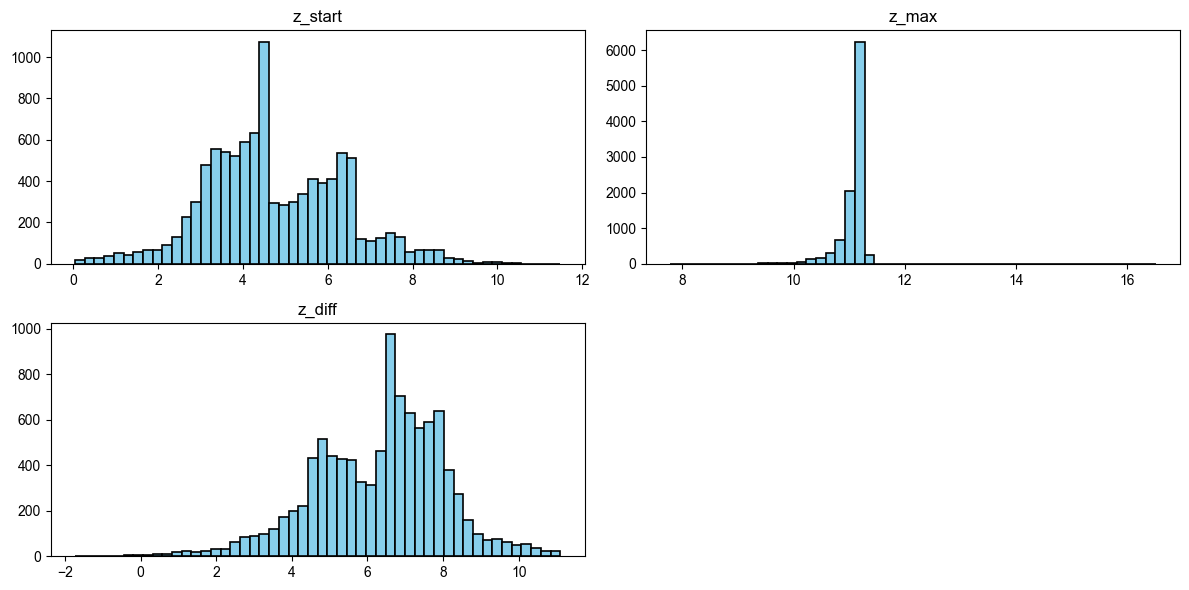

In [78]:
# Define the function
def f(x, y):
    return (-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)

# Create an empty dataframe to store the simulation data
simulation_data = pd.DataFrame(columns=['x_start', 'y_start', 'x_max', 'y_max', 'z_diff'])

# Define the number of simulations
num_simulations = 10000
learning_rate = 0.03
epochs = 1000

# Perform the simulations
for _ in range(num_simulations):
    # Generate random starting coordinates
    x_start = np.random.normal(0, 1)
    y_start = np.random.normal(0, 1)
    
    # Perform the gradient ascent algorithm and obtain the maximum point
    x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs)
    
    # Calculate the difference between the maximum and starting z values
    z_start = f(x_start, y_start)
    z_max = f(x_max, y_max)
    z_diff = z_max - z_start

    # Create a new DataFrame with the data for this simulation
    new_data = pd.DataFrame([{'x_start': x_start, 'y_start': y_start, 'z_start': z_start, 'x_max': x_max, 'y_max': y_max, 'z_max': z_max, 'z_diff': z_diff}])

    # Concatenate the new data to the simulation_data DataFrame
    simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)

print(simulation_data.describe())
print("\n")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Top left: z_start
axs[0, 0].hist(simulation_data["z_start"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 0].set_title('z_start')

# Top right: z_max
axs[0, 1].hist(simulation_data["z_max"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 1].set_title('z_max')

# Bottom: z_diff
axs[1, 0].hist(simulation_data["z_diff"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[1, 0].set_title('z_diff')

# Remove the unused subplot
fig.delaxes(axs[1,1])

plt.tight_layout()
plt.show()

In [53]:
132# Define the function
def f(x, y):
    return -(x^2 + y^2)

# Create an empty dataframe to store the simulation data
simulation_data = pd.DataFrame(columns=['x_start', 'y_start', 'x_max', 'y_max', 'z_diff'])

# Define the number of simulations
num_simulations = 10000
learning_rate = 0.02
epochs = 1000

# Perform the simulations
for _ in range(num_simulations):
    # Generate random starting coordinates
    x_start = np.random.normal(0, 1)
    y_start = np.random.normal(0, 1)
    
    # Perform the gradient ascent algorithm and obtain the maximum point
    x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs)
    
    # Calculate the difference between the maximum and starting z values
    z_start = f(x_start, y_start)
    z_max = f(x_max, y_max)
    z_diff = z_max - z_start

    # Create a new DataFrame with the data for this simulation
    new_data = pd.DataFrame([{'x_start': x_start, 'y_start': y_start, 'z_start': z_start, 'x_max': x_max, 'y_max': y_max, 'z_max': z_max, 'z_diff': z_diff}])

    # Concatenate the new data to the simulation_data DataFrame
    simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)

print(simulation_data.describe())
print("\n")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Top left: z_start
axs[0, 0].hist(simulation_data["z_start"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 0].set_title('z_start')

# Top right: z_max
axs[0, 1].hist(simulation_data["z_max"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0, 1].set_title('z_max')

# Bottom: z_diff
axs[1, 0].hist(simulation_data["z_diff"], bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
axs[1, 0].set_title('z_diff')

# Remove the unused subplot
fig.delaxes(axs[1,1])

plt.tight_layout()
plt.show()
    

-0.0